In [73]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import pymc3 as pm
import seaborn as sns
import arviz as az
import pandas as pd

# Question 1: Generating 10 points of f(x)

In [59]:
def f(x):
    return np.cos(2 * np.pi * x)

In [60]:
np.random.seed(123)
x = np.linspace(0,4*np.pi, 10)
f(x) 

array([ 1.        , -0.79499544,  0.26403549,  0.37518142, -0.86057052,
        0.99311785, -0.7184778 ,  0.14925529,  0.48116325, -0.91430047])

# Question 2: Adding a Gaussian error to get the y value

In [61]:
ϵ = np.random.normal(0,12, 10)
y = f(x) + ϵ
y

array([-12.02756724,  11.17314992,   3.65977746, -17.70035514,
        -7.80377355,  20.8103563 , -29.83862872,  -4.99769626,
        15.67239836, -11.3151853 ])

# Question 3: Fit polynomials of degree deg_i(1,2,...,9)

In [62]:
# degree numbers
deg1 = np.polyfit(x,y,1) 
deg2 = np.polyfit(x,y,2)
deg3 = np.polyfit(x,y,3)
deg4 = np.polyfit(x,y,4)
deg5 = np.polyfit(x,y,5)
deg6 = np.polyfit(x,y,6)
deg7 = np.polyfit(x,y,7)
deg8 = np.polyfit(x,y,8)
deg9 = np.polyfit(x,y,9)

# Question 4: Sketching the 10 points with all 9 polynomial degrees

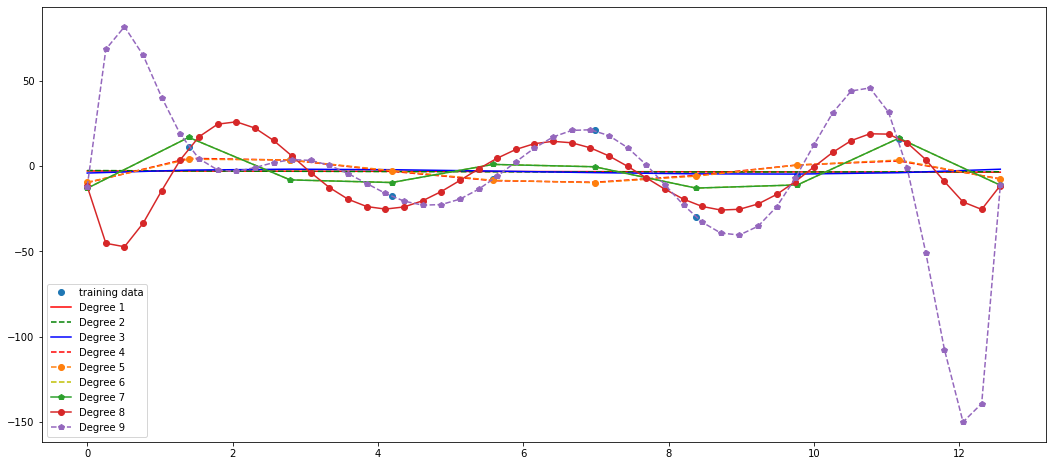

In [63]:
x1 = np.linspace(0, 4*np.pi,10)
y1 = np.polyval(deg1,x1)

x2 = np.linspace(0, 4*np.pi,10)
y2 = np.polyval(deg2,x2)

x3 = np.linspace(0, 4*np.pi,10)
y3 = np.polyval(deg3,x3)

x4 = np.linspace(0, 4*np.pi,10)
y4 = np.polyval(deg4,x4)

x5 = np.linspace(0, 4*np.pi,10)
y5 = np.polyval(deg5,x5)

x6 = np.linspace(0, 4*np.pi,10)
y6 = np.polyval(deg6,x6)

x7 = np.linspace(0, 4*np.pi,10)
y7 = np.polyval(deg6,x7)

x8 = np.linspace(0, 4*np.pi)
y8 = np.polyval(deg8,x8)

x9 = np.linspace(0, 4*np.pi)
y9 = np.polyval(deg9,x9)

plt.figure(figsize=(18,8))
plt.plot(x,y,'o', label= 'training data')
plt.plot(x1,y1, 'r-', label='Degree 1')
plt.plot(x2,y2, 'g--', label='Degree 2')
plt.plot(x3,y3, 'b-', label='Degree 3')
plt.plot(x4,y4, 'r--', label='Degree 4')
plt.plot(x5,y5, 'o--', label='Degree 5')
plt.plot(x6,y6, 'y--', label='Degree 6')
plt.plot(x7,y7, 'p-', label='Degree 7')
plt.plot(x8,y8, 'o-', label='Degree 8')
plt.plot(x9,y9, 'p--', label='Degree 9')
plt.legend()

# Question 5: Creating a table of weights (coefficients) 

In [74]:
d_dict = {'deg1':deg1, 'deg2':deg2, 'deg3':deg3, 'deg4':deg4, 'deg5':deg5, 'deg6':deg6, 'deg7':deg7, 'deg8':deg8, 'deg9':deg9}
min_length = 10

df = pd.DataFrame({k:pd.Series(v[:min_length]) for k,v in d_dict.items()})
print(df)

       deg1      deg2      deg3       deg4       deg5       deg6       deg7  \
0 -0.057217  0.010809  0.021612  -0.034365  -0.000706  -0.007198  -0.001152   
1 -2.877247 -0.193045 -0.396572   0.885298  -0.012197   0.270640   0.043465   
2       NaN -2.624377  1.749341  -7.163196   0.642261  -3.845545  -0.606643   
3       NaN       NaN -4.106904  18.587341  -6.082737  25.569494   3.714169   
4       NaN       NaN       NaN  -9.749372  16.958494 -78.861089  -8.027719   
5       NaN       NaN       NaN        NaN  -9.524688  91.088337  -7.665996   
6       NaN       NaN       NaN        NaN        NaN -13.015575  36.868853   
7       NaN       NaN       NaN        NaN        NaN        NaN -12.385532   
8       NaN       NaN       NaN        NaN        NaN        NaN        NaN   
9       NaN       NaN       NaN        NaN        NaN        NaN        NaN   

         deg8        deg9  
0    0.001095    0.000584  
1   -0.056175   -0.031923  
2    1.172822    0.728041  
3  -12.771142   -8

# Question 6: Computation of RMSEs

In [76]:
rmse_1 = sqrt(mean_squared_error(y, y1))
print('RMSE for polynomial of degree 1 is:',rmse_1 )

rmse_2 = sqrt(mean_squared_error(y, y2))
print('RMSE for polynomial of degree 2 is:',rmse_2 )

rmse_3 = sqrt(mean_squared_error(y, y3))
print('RMSE for polynomial of degree 3 is:',rmse_3 )

rmse_4 = sqrt(mean_squared_error(y, y4))
print('RMSE for polynomial of degree 4 is:',rmse_4 )

rmse_5 = sqrt(mean_squared_error(y, y5))
print('RMSE for polynomial of degree 5 is:',rmse_5 )

rmse_6 = sqrt(mean_squared_error(y, y6))
print('RMSE for polynomial of degree 6 is:',rmse_6 )

rmse_7 = sqrt(mean_squared_error(y, y7))
print('RMSE for polynomial of degree 7 is:',rmse_7 )



RMSE for polynomial of degree 1 is: 15.079303743347639
RMSE for polynomial of degree 2 is: 15.078526310388114
RMSE for polynomial of degree 3 is: 15.04303546167378
RMSE for polynomial of degree 4 is: 14.077979024511588
RMSE for polynomial of degree 5 is: 14.074093719314837
RMSE for polynomial of degree 6 is: 10.426600365980768
RMSE for polynomial of degree 7 is: 10.426600365980768


# Question 7 : Probabilistic Regression model

In [65]:
# Let the coefficents of the polynomial of degree 3 be:
β = deg3 # polynomial of degree 3
α = deg3[0]

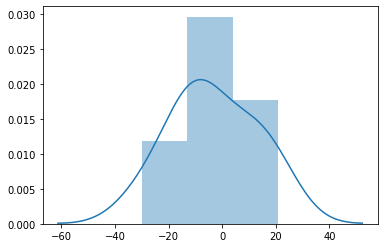

In [66]:
sns.distplot(y) 

In [67]:
with pm.Model() as Polynom:
    # Priors for unknown model parameters
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10,shape = 4)
    #σ = pm.Normal('σ',sd=12)
    
    
    # Expected value of outcome
    μ = α + β[1]*x1 + β[2]*x2 + β[3]*x3
    
    # Likelihood (sampling distribution) of observations
    y_ = pm.Normal('y_', mu=μ, observed=y)
    
    trace = pm.sample(2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains, 0 divergences: 100%|█████████████████████████████████████████| 6000/6000 [10:03<00:00,  9.94draws/s]


C:\Users\omphe\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\omphe\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\omphe\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\omphe\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E8A07F748>,
      dtype=object)

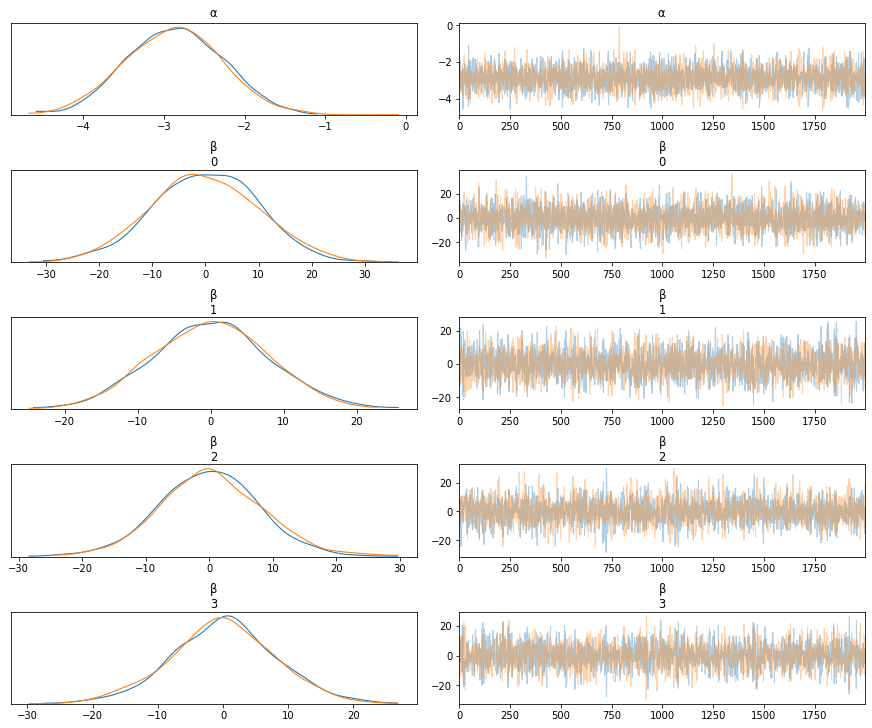

In [68]:
az.plot_trace(trace)

In [69]:
az.summary(y)

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
x,-3.237,15.897,-29.839,20.81,5.027,3.849,10.0,9.0,10.0,10.0,NaN
